---
CCOM3031: Pharmacogenomics Replicathon
---

Team 5: Kenny J. Davila Salgado, Stephanie M. Ramos Camacho, Erick M.Ivanovich, Alejandro Soledad Méndez 


In [ ]:
# filter dplyr warnings
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

## I. Exploratory analysis of pharmacogenomic data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/MyDrive/rawPharmacoData.csv')

In [ ]:
%%R

install.packages("plyr")
library(ggplot2)
library(dplyr)
library(tidyr)
library(plyr)


# Loading data 
rawFile <- "rawPharmacoData.csv"
rawFile2 <- "summarizedPharmacoData.csv"
pharmacoData <- read.csv(rawFile)
pharmacoDataS <- read.csv(rawFile2)
viability1 <- pharmacoData$viability
cellLine1 <- pharmacoData$cellLine
ic50CCLE <- pharmacoDataS$ic50_CCLE

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

Questions:
1.  How many cell-lines are contained in the data?

The total cell-lines would be 43427, but if we take out the repeating ones, then it would be 2557.

In [ ]:
%%R
#We needed to find the number of cells by measuring the length of unique cell lines. 
head( pharmacoData )
str( pharmacoData )

length( levels( pharmacoData$drug ) )


tapply( pharmacoData$doseID, pharmacoData$study, function(x){
        length( unique( x ) )
    })

'data.frame':	43427 obs. of  6 variables:
 $ cellLine     : chr  "22RV1" "22RV1" "22RV1" "22RV1" ...
 $ drug         : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ doseID       : chr  "doses1" "doses2" "doses3" "doses4" ...
 $ concentration: num  0.0025 0.008 0.025 0.08 0.25 0.8 2.53 8 0.0025 0.008 ...
 $ viability    : num  110 107.7 97.8 115.1 129.5 ...
 $ study        : chr  "CCLE" "CCLE" "CCLE" "CCLE" ...
CCLE GDSC 
   8    9 


2. What drug concentrations were used in each study?

6 concentrations were used. These are: 0.0025, 0.008, 0.25, 0.8, 2.53 and 8.


3. Histograms, appart from telling how is the data
distributed, can also make evident potential
problems with the data. Plot a histogram
of drug viabilities. Does it look as one would
expect from the description of the data?


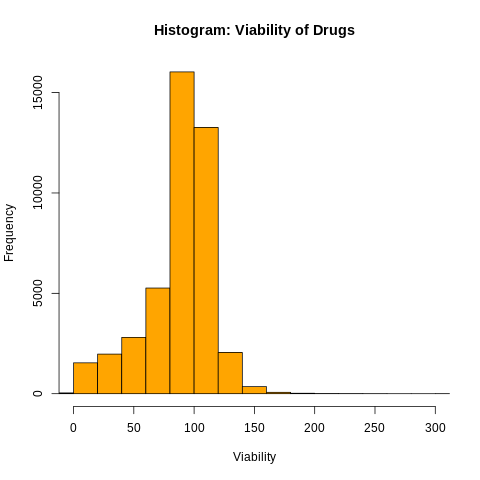

In [ ]:
%%R
#Histogram 
hist(viability1, 
  main="Histogram: Viability of Drugs", 
  xlab="Viability", 
  border="black", 
  col="orange",
  xlim=c(0,300))

Although, we would expect that the data seems normal it has a slight skew to the left. Otherwise, it looks like it is normally distributed, with most of its data points around 100.

4. How many viability data points are within the
expected range according to the definition of viability (e.g. above 0 
and below 100)? Try to come up with explanations about
the values that are out of range. Are these due to technical
issues? Biology?


In [ ]:
%%R
#We looked at how the range was distributed 
range( viability1 )
sum( viability1 < 0 )
sum( viability1 > 100 )

[1] 15778


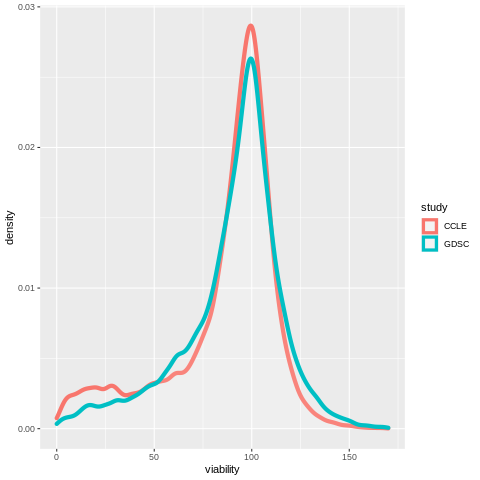

In [ ]:
%%R
#We plotted to aid in the visualization.
ggplot( pharmacoData, aes( viability, group=study, colour=study) ) +
    geom_density(fill="white", lwd=2, alpha=0.1) + xlim(0, 170)

The total amount of data point outside 0 and 100 mounts to 15801, it might seem that those are weird results, but it is part of the experiment. Sometimes, cell lines die before drugs are administered if they are not maintained. On the other had, since viability is a relative value sometimes there is no covergence to a maximum cap. Therefore, we see calues above 100, maybe due to internal mechanisms. 

5. Read the csv file containing the summarized data files. What kind of variables are in the data? What does each column represents?

* cellLine (char): Cell culture 
* Drug (char): Name of the drug
* ic50_CCLE (num): The estimated concentration of the drug that will result in half (50%) of the cells surviving for the Cancer Cell Line Study
* auc_CCLE (num): Area under the curve for the Cancer Cell Line Study
* ic50_GDSC (num): The estimated concentration of the drug that will result in half (50%) of the cells surviving for the Genomics of Drug Sensitivity in Cancer Study 
* auc_GDSC (num): Area under the curve for Genomics of Drug Sensitivity in Cancer Study

In [ ]:
%%R
#looking at a summary of the data. 
head(pharmacoDataS)
str(pharmacoDataS)

'data.frame':	2557 obs. of  6 variables:
 $ cellLine : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug     : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE: num  8 7.48 8 1.91 8 ...
 $ auc_CCLE : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC: num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...


6. Plot a histogram of the viability scores as a function of the drug doses. Are stronger drug concentrations consistent with lower viability scores?

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



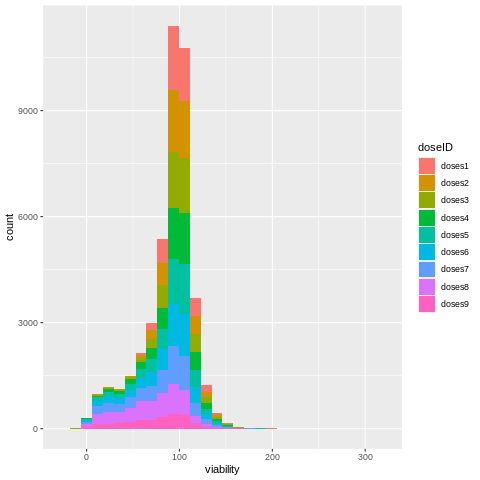

In [ ]:
%%R
#plot depicting the diferent doses in each concentration. 
ggplot(pharmacoData, aes(viability, fill = doseID)) + geom_histogram()

As shown above, we cannot simply say that a higher concentration implies a lower viability, since we are seeing a nonuniform distribution on the highest concentration. doses 1 tio 6 correspons to higher concentrations (0.0025, 0.008, 0.25, 0.8, 2.53 and 8) whilst doses 7 - 9 correspond to microMolar concentrations. 

## II. Using Correlation Measures to Assess Replicability of Drug Response Studies
 

7. We have explored Pearson and Spearman correlation, but what about other correlation measures? For example, you could try out distance correlation, which is sensitive to nonlinear relationships. You can find this measure in the `energy` R package, which you'll need to install and load with the following commands:


...

1. Create a scatterplot for each drug comparing the AUC in GDSC and CCLE for all cell lines (hint: code from Tutorial 2 may help).

'data.frame':	2557 obs. of  10 variables:
 $ cellLine        : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug            : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE       : num  8 7.48 8 1.91 8 ...
 $ auc_CCLE        : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC       : num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC        : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...
 $ cutoff          : num  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
 $ sensitivity_GDSC: Factor w/ 2 levels "Resistant","Sensitive": 1 1 1 1 1 1 1 1 1 2 ...
 $ sensitivity_CCLE: Factor w/ 2 levels "Resistant","Sensitive": 1 1 1 2 1 1 1 1 1 2 ...
 $ category        : chr  "Both Resistant" "Both Resistant" "Both Resistant" "GDSC Resistant / CCLE Sensitive" ...


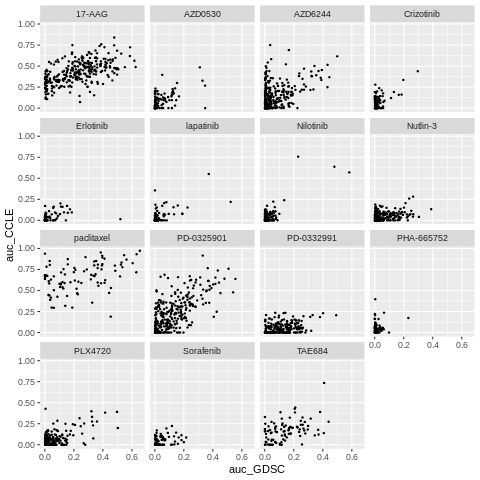

In [ ]:
%%R
#Meassuring the lengths of specific variables.
str(pharmacoDataS)
length(unique(pharmacoDataS$cellLine))
length(unique(pharmacoDataS$drug))

#plotting all plots with the datapoints for each study.
ggplot(aes(x=auc_GDSC, y=auc_CCLE), data=pharmacoDataS) +
    geom_point(cex=0.5) + 
    facet_wrap(facets=~drug)

2. Calculate correlation coefficients of the AUC in GDSC and CCLE for each drug (hint: code from Tutorial 2 may help). 


In [ ]:
%%R 
#We looked summarised both Pearson and Spearman correlations. 
drugCorrs <- pharmacoDataS %>% 
    group_by(drug) %>% summarise(Pearson_auc=cor((auc_GDSC),(auc_CCLE), method="pearson"),
                                 Spearman_auc=cor((auc_GDSC),(auc_CCLE), method="spearman"))
drugCorrs

  Pearson_auc Spearman_auc
1   0.6672839    0.5402709


3. Based on the scatterplot and correlation values, would you say that they tend to agree? Why or why not?

Although the Pearson coefficient generally outperforms the Spearman coefficient, both a Pearson and Spearman coefficient greater than 0.5 indicate moderate correlation between the studies. Nevetherless, the values evidence that they do not agree with each other.

4. Does the AUC or IC50 suggest more agreement between the studies? 

In [ ]:
%%R

#We transformed the data to better interpret this correlations.
drugCorrs <- pharmacoDataS %>% 
    group_by(drug) %>% summarise(Pearson_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="pearson"),
                                 Spearman_ic50=cor(-log10(ic50_GDSC/10^6),-log10(ic50_CCLE/10^6), method="spearman"))
drugCorrs

  Pearson_ic50 Spearman_ic50
1    0.6751145     0.5554557


AUC seems to suggest more agreement between the studies.

5. Which drug do you think shows the most consistency between the studies? How about the least? 

TAE684 (drug 15) shows the most consistency between the studies while Nilotinib (drug 7) shows the least.

6. If you calculated more than one type of correlation coefficient (for example Pearson and Spearman), how do they differ? Which do you think is a better summary of the consistency between the two studies?

The Pearson coefficient is mostly used for measurements used for an interval scale since the individual units are meaningful as opposed to the Spearman coefficient which is based on ambiguous ordinal type scales. For both the GDSC and CCLEE studies, the Pearson coefficient summarizes better the consistency between them since the viability of each concentration can be measured in an interval scale. 

## Identifying biological factors that influence replicability of pharmacogenomic studies



1. Are there any cell lines that seem to be consistently sensitive? (Hint: look for the 5 cell lines which seem the most resistant in both studies according to the average drug response by AUC; code from Tutorial 3 may help) What effect might this have on your conclusions and interpretations of the agreement between the studies? For example, do you observe any increase in replicability (as measured by correlation of drug response) if you exclude the most resistant cell lines?

In [ ]:
%%R
#Summary of the data 
str(pharmacoDataS)

'data.frame':	2557 obs. of  6 variables:
 $ cellLine : chr  "22RV1" "5637" "639-V" "697" ...
 $ drug     : chr  "Nilotinib" "Nilotinib" "Nilotinib" "Nilotinib" ...
 $ ic50_CCLE: num  8 7.48 8 1.91 8 ...
 $ auc_CCLE : num  0 0.00726 0.07101 0.15734 0 ...
 $ ic50_GDSC: num  155.27 219.93 92.18 3.06 19.63 ...
 $ auc_GDSC : num  0.00394 0.00362 0.00762 0.06926 0.02876 ...


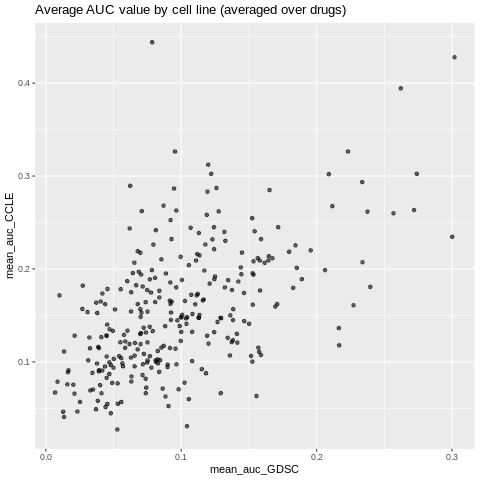

In [ ]:
%%R

#Looking at the study averages by AUC and IC50
drugAvg <- pharmacoDataS %>% 
              group_by(cellLine) %>%
              dplyr::summarise(mean_ic50_CCLE = mean(-log10(ic50_CCLE/10^6)), 
                        mean_ic50_GDSC = mean(-log10(ic50_GDSC/10^6)),
                        mean_auc_CCLE = mean(auc_CCLE),
                        mean_auc_GDSC = mean(auc_GDSC)) 
              
ggplot(drugAvg, aes(x=mean_auc_GDSC, y=mean_auc_CCLE)) +
    geom_point(alpha=0.6) +
    ggtitle("Average AUC value by cell line (averaged over drugs)")
                  


In [ ]:
%%R

#Filtering the most sensitive in both studies. 
top5_auc_lines <- drugAvg %>% 
                    group_by(cellLine) %>% 
                    filter(mean_auc_CCLE < 0.05) %>%  
                    filter(mean_auc_GDSC < 0.05)      #The cutoff in 0.05 was not made arbitrary, 
                                                      #if you look at the graph, you see that 5 cell lines
                                                      #reside in both CCLE < 0.05 and GDSC < 0.05.   

top5_auc_lines

# A tibble: 5 × 5
# Groups:   cellLine [5]
  cellLine  mean_ic50_CCLE mean_ic50_GDSC mean_auc_CCLE mean_auc_GDSC
  <chr>              <dbl>          <dbl>         <dbl>         <dbl>
1 BT-20               5.10           4.42        0.0446        0.0480
2 LCLC-103H           5.15           4.35        0.0489        0.0371
3 NCI-H1092           5.10           3.93        0.0406        0.0134
4 NCI-H1694           5.30           4.23        0.0465        0.0233
5 NCI-H810            5.12           3.84        0.0462        0.0129


Yes, there 5 cell lines that lie between mean_auc_CCLE < 0.05 and mean_auc_GDSC < 0.05 seem consistently sensitive. Despite the Pearson and Spearman coefficients evidencing a lack of agreeement between the studies, the average drug response plot suggests that there is a correlation. Even if these 5 cell lines are excluded, the drug and study correlation seems mostly unaffected.



2. Classify each cell line as resistant or sensitive to a drug based on its AUC value (Hint: choose a cutoff for which cell lines with AUC below the cutoff are considered sensitive and explain your choice of cutoff(s); code from Tutorial 3 may help). Compare the resistance status of cell lines in GDSC and CCLE for each drug using either a scatterplot of AUC values colored by resistance/sensitivity in each study or a table.

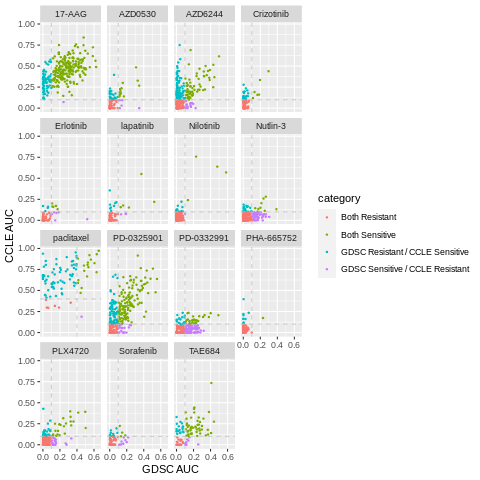

In [ ]:
%%R
#Creating cutoffs
pharmacoDataS <- pharmacoDataS %>% 
              mutate(cutoff = ifelse(drug=="paclitaxel", 0.4, 0.1)) %>%
              mutate(sensitivity_GDSC = factor(ifelse( auc_GDSC < cutoff, "Resistant", "Sensitive")), 
                     sensitivity_CCLE = factor(ifelse( auc_CCLE < cutoff, "Resistant", "Sensitive"))) 
              
#Revaluing data for better interpretation.                      
pharmacoDataS <- pharmacoDataS %>% 
              mutate(category = paste(sensitivity_GDSC, sensitivity_CCLE)) %>%
              mutate(category = revalue(category, c("Resistant Resistant" = "Both Resistant",
                                                    "Sensitive Sensitive" = "Both Sensitive",
                                                    "Resistant Sensitive" = "GDSC Resistant / CCLE Sensitive",
                                                    "Sensitive Resistant" = "GDSC Sensitive / CCLE Resistant")))


#Plotting all drugs for the AUC statistic, each color depicts a different revalue, and it is applied for both studies.
ggplot(aes(x=auc_GDSC, y=auc_CCLE, colour=category), data=pharmacoDataS) +
    geom_point(cex=0.5) + 
    facet_wrap(facets=~drug) +
    xlab("GDSC AUC") +
    ylab("CCLE AUC") +
    geom_hline(aes(yintercept=cutoff), colour="grey", alpha=0.75, lty=2) +
    geom_vline(aes(xintercept=cutoff), colour="grey", alpha=0.75, lty=2) 


Resistant (with AUC values close to zero) and half are sensitive (with high AUC values). We can notice that most of the graphs grow in a linear manner and that indicates that the drugs are inclined to CCLE since it is variable on the y axis and sensitive GPSC. The closer to 0, the more resistant the drugs and that means that the cell lines does not respond to treatment by drug (no matter how much dose is given to that cell line, the viability will not change, it is near 100%). 

3. Compute the Matthews correlation coefficient for sensitivity status (from #2) of cell lines in GDSC and CCLE for each drug (Hint: code from Tutorial 3 may help).

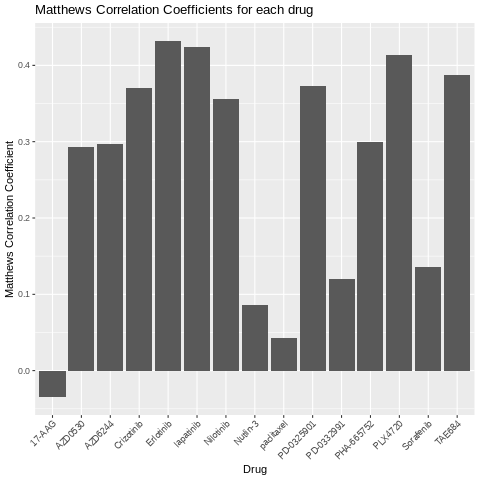

In [ ]:
%%R
            
# Function to calculate the MCC from two vectors with possible values "Sensitive" and "Resistant"
mcc <- function (study1, study2)
{
  BS <- sum(study1 == "Sensitive" & study2 == "Sensitive") 
  BR <- sum(study1 == "Resistant" & study2 == "Resistant") 
  SR <- sum(study1 == "Sensitive" & study2 == "Resistant") 
  RS <- sum(study1 == "Resistant" & study2 == "Sensitive") 
  
  if (BS+SR == 0 | BS+RS == 0 | BR+SR == 0 |  BR+RS ==0){
    mcc <- ((BS*BR)-(SR*RS)) 
  }else{
    mcc <- ((BS*BR)-(SR*RS)) / sqrt(exp((log(BS+SR)+log(BS+RS)+log(BR+SR)+log(BR+RS))))
  }
  return(mcc)
}


drugCorrs <-  pharmacoDataS %>% group_by(drug) %>%
  dplyr::summarise(matthews_corr = mcc(sensitivity_GDSC, sensitivity_CCLE))

drugCorrs

#Plotting the drugs with their respecting matthews correlation.
ggplot(data=drugCorrs, aes(x=drug, y=matthews_corr)) +
  geom_bar(stat="identity") + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Drug")+
  ylab("Matthews Correlation Coefficient") +
  ggtitle("Matthews Correlation Coefficients for each drug")

In [ ]:
%%R
#Matthew correlations
drugCorrs <-  pharmacoDataS %>% group_by(drug) %>%
  dplyr::summarise(matthews_corr = mcc(sensitivity_GDSC, sensitivity_CCLE))

drugCorrs

# A tibble: 15 × 2
   drug       matthews_corr
   <chr>              <dbl>
 1 17-AAG           -0.0350
 2 AZD0530           0.293 
 3 AZD6244           0.297 
 4 Crizotinib        0.371 
 5 Erlotinib         0.432 
 6 lapatinib         0.424 
 7 Nilotinib         0.356 
 8 Nutlin-3          0.0856
 9 paclitaxel        0.0432
10 PD-0325901        0.373 
11 PD-0332991        0.121 
12 PHA-665752        0.300 
13 PLX4720           0.414 
14 Sorafenib         0.136 
15 TAE684            0.387 


4. Are there any drugs for which most or all cell lines seem to be resistant in both studies (Hint: for each cell line, look at its average response across all drugs; code from Tutorial 3 may help)? If so, what are the correlation values for these drugs? What do these results imply about the replicability of these studies?


First off, it is worth noting that Matthew coefficients greater than 0.3 but less than 0.4 demonstrate a moderate positive relationship, values from 0.4 to 0.7 are considered a strong positive relationship. Therefore, the studies surpassing 0.3 evidence a relevant agreement: Erlotinib, Laptinib, Nilotinib, PD-0325901, PHA-665752, PLX4720, TAE684. On the other hand, those near 0 indicate no agreement at all. Given the consistent relationship of the Matthew coefficients for these studies, it is highly probable that they are replicable indeed.

5. Compare the Matthews correlation coefficient values by drug classes defined in Tutorial 3 (No effect, Narrow effect, Broad effect). Which drug class shows the most agreement between the studies? 

* **No effect**: minimal observed response for all cell lines
    + sorafenib
    + erlotinib
    + PHA-665752
* **Narrow effect**: response in only a small subset of cell lines
    + nilotinib
    + lapatinib
    + nutlin-3
    + PLX44720
    + crizotinib
    + PD-0332991
    + AZD0530
    + TAE684
* **Broad effect**: response in a large number of cell lines
    + AZD6244
    + PD-0325901
    + 17-AAG
    + paclitaxel

The most agreement shown comes from those with most resistance. If we look at the drugs which present no effect in the studies, they tend to be the most resistant to the drug. Secondly, when no agreement exists between the studies, the drugs tend to provide a mayor response in the studies.

6. Would you say that the sensitivity results for the two studies tend to agree?



Following the matthew correlation coefficient, the greater the agreement, the greater the resistance, and the lower the agreement, the greater the resistance. Drugs classified as "broad effect" are the most correlated between the two studies.

## Modeling the relation between two variables (drug concentration vs viability)

...

1. Explore the response curves for several drug-cell line combinations. How many drugs-cell line combinations contain viability response values that would potentially enable them to be summarized into an IC50 value? You can answer this, for example, by checking whether there are viability values below 50%.

In [ ]:
%%R
#Reviewing data
head(pharmacoDataS)

  cellLine      drug ic50_CCLE  auc_CCLE  ic50_GDSC auc_GDSC cutoff
1    22RV1 Nilotinib  8.000000 0.0000000 155.269917 0.003935    0.1
2     5637 Nilotinib  7.475355 0.0072625 219.934550 0.003616    0.1
3    639-V Nilotinib  8.000000 0.0710125  92.177125 0.007622    0.1
4      697 Nilotinib  1.910434 0.1573375   3.063552 0.069265    0.1
5    769-P Nilotinib  8.000000 0.0000000  19.633514 0.028758    0.1
6    786-0 Nilotinib  8.000000 0.0750125 137.066882 0.005482    0.1
  sensitivity_GDSC sensitivity_CCLE                        category
1        Resistant        Resistant                  Both Resistant
2        Resistant        Resistant                  Both Resistant
3        Resistant        Resistant                  Both Resistant
4        Resistant        Sensitive GDSC Resistant / CCLE Sensitive
5        Resistant        Resistant                  Both Resistant
6        Resistant        Resistant                  Both Resistant


In [ ]:
%%R
#A summation for ic50 of CCLE < 8.
message("Number of combinations with viability below 0.5 given fixed dosage:")
sum(ic50CCLE < 8)

R[write to console]: Number of combinations with viability below 0.5 given fixed dosage:



[1] 895


In [ ]:
%%R
#A summation for ic50 of CCLE = 8.
message("Number of combinations with viability above 0.5 given fixed dosage:")
sum(ic50CCLE == 8)

R[write to console]: Number of combinations with viability above 0.5 given fixed dosage:



[1] 1662


In [ ]:
%%R
#A summation for viability below 0.5 for some drugs.
message("Number of combinations with viability below 0.5 for certain doses:")
length(unique(cellLine1[viability1 < 0.5]))

R[write to console]: Number of combinations with viability below 0.5 for certain doses:



[1] 15


In [ ]:
%%R
#A summation for viability above 0.5 for all drugs.
message("Number of combinations with viability above 0.5 for all doses:")
length(unique(cellLine1)) - length(unique(cellLine1[viability1 < 0.5]))

R[write to console]: Number of combinations with viability above 0.5 for all doses:



[1] 273


2. Analyze the re-calculations of IC50 and AUCs from the drug 17-AAG in the H4 cell-line and the drug Nilotinib cell-line in the 22RV1 cell-line. See the figure below and asnwer: which statistic is more roboust, IC50 or AUC? Which statistic is more generalizable, IC50 or AUC? Justify your answer with examples and/or using the whole data recalculations from the mySummarizedData variable.

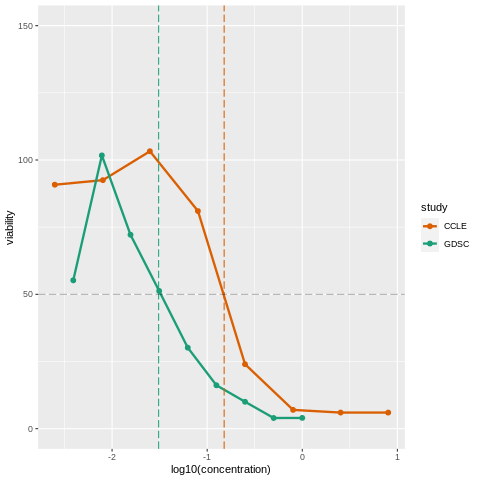

In [ ]:
%%R

#Creating a  plot depicting the relation of IC50 for both studies with respect of the log(concentration).
plotResponse = function(drugA, cellLineA, addPublishedIC50 = TRUE){
  pharSub = filter(pharmacoData, drug == drugA, cellLine==cellLineA)
  sumSub  = filter(pharmacoDataS, drug == drugA, cellLine==cellLineA)
  
  p = ggplot(pharSub, aes( log10(concentration), viability, col=study)) +
      geom_point(size=2.1) + geom_line(lwd=1.1) + ylim(0, 150) +
      scale_colour_manual(values = c("CCLE" = "#d95f02", "GDSC" = "#1b9e77" ))
  
  if(addPublishedIC50){
      p = p + geom_vline(sumSub, xintercept = log10(sumSub[, "ic50_CCLE"]),
                         col = "#d95f02", linetype = "longdash") +
          geom_vline(xintercept = log10(sumSub[, "ic50_GDSC"]), col = "#1b9e77",
                     linetype = "longdash") +
          geom_hline(yintercept = 50, col = "#00000050", linetype = "longdash")
      }
  
  xlims = xlim(range(log10(c(pharSub$concentration, sumSub$ic50_CCLE, sumSub$ic50_GDSC))))
  
  p + xlims
}

plotResponse(drugA = "17-AAG", cellLineA = "H4", TRUE)

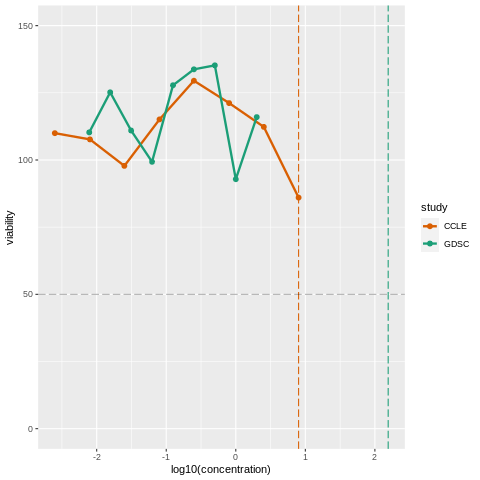

In [ ]:
%%R
#Same plot response but with a different drug and cellline.
plotResponse(drugA = "Nilotinib", cellLineA = "22RV1")

When we are looking at the two models we need to consider every factor that plays in them. In the case of IC50 values, they are more generalizable than AUC, but these values need a specific range to be interpreted correctly. On the other hand, we have AUC values that can be more strong in terms of implications and interpretations, but lack generality. 

3. Are the results more replicable if one uses the same code to calculate IC50 or AUC on the different datasets? Hint: you can use code from tutorial #3 to evaluate this.

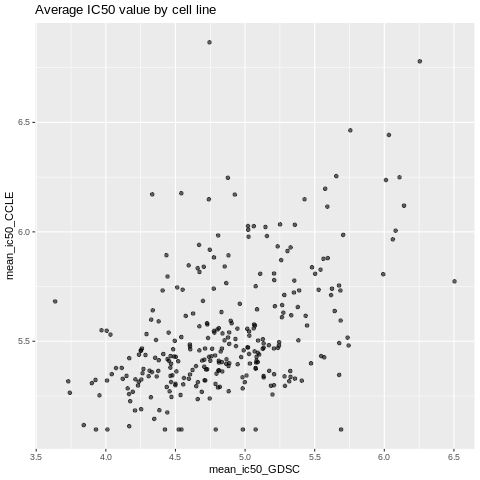

In [ ]:
%%R
#plot with information about the means of statistics done to the different studies. In this case IC50.
drugAvg = pharmacoDataS %>% 
              group_by(cellLine) %>%
              dplyr::summarise(mean_ic50_CCLE = mean(-log10(ic50_CCLE/10^6)), 
                        mean_ic50_GDSC = mean(-log10(ic50_GDSC/10^6)),
                        mean_auc_CCLE = mean(auc_CCLE),
                        mean_auc_GDSC = mean(auc_GDSC)) 

ggplot(drugAvg, aes(x = mean_ic50_GDSC, y = mean_ic50_CCLE)) +
    geom_point(alpha = 0.6) +
    ggtitle("Average IC50 value by cell line")

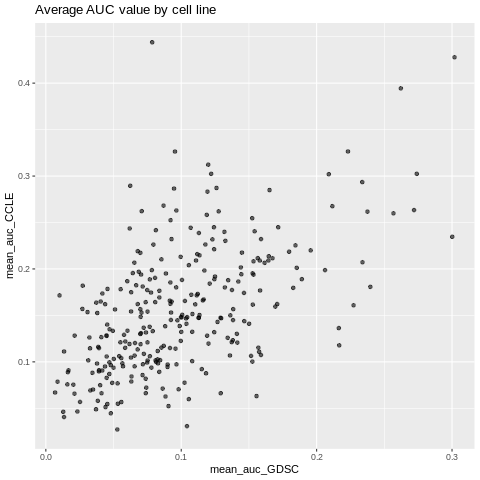

In [ ]:
%%R
#plot with information about the means of statistics done to the different studies. In this case AUC.
ggplot(drugAvg, aes(x = mean_auc_GDSC, y = mean_auc_CCLE)) + 
  geom_point(alpha=0.6) +
  ggtitle("Average AUC value by cell line")

While IC50 may generalize certain pharmacological trends from the study, the IC50 graphical distribution shown above seems less consistent than AUC. The data points in AUC are much more compact, following a linear trend with less outliers than IC50. Therefore, it is easier to predict true positives and true negatives the higher the AUC values is. 

4. Summarize the viability curves of all the drugs in each cell-line using the slope of linear model. Is the slope of the linear regression informative of the drug response? Can we improve the replicability of the studies by using the value of the slope instead of IC50s or AUCs?


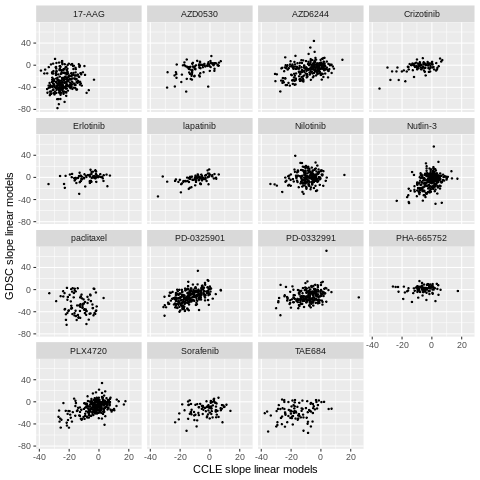

In [ ]:
%%R
#Creating linear models to interpret the da
linearModel = function(drugA, cellLineA, studyA){
    #Filtering the data to make the linear models.
    pharSub = filter(pharmacoData, drug == drugA, 
                      cellLine == cellLineA, study == studyA)
    
    #Transforming data and doing fits for the linear regressions.
    pharSub$concentration = log10(pharSub$concentration)
    fit = lm(viability~ concentration, pharSub)
    coefficients(fit)["concentration"]
}

#Initializing parameters for the 'for' loop.
slopes_CCLE = numeric(0)
slopes_GDSC = numeric(0)

#Adding data to the initialized study slopes. 
for (i in 1:length(pharmacoDataS$drug)) {
  slopes_CCLE = c(slopes_CCLE, linearModel(pharmacoDataS$drug[i],
                                         pharmacoDataS$cellLine[i], "CCLE"))
  slopes_GDSC = c(slopes_GDSC, linearModel(pharmacoDataS$drug[i], 
                                         pharmacoDataS$cellLine[i], "GDSC"))
}

#Creating a dataframe containing the collect the analized slopes on each study. 
AlldataSlopes = cbind(pharmacoDataS, slopes_CCLE, slopes_GDSC)

#Ploting all the slopes of each study on all drugs.
ggplot(aes(x = slopes_CCLE, y = slopes_GDSC), data = AlldataSlopes) +
    geom_point(cex=0.5) + 
    facet_wrap(facets=~drug) +
    xlab("CCLE slope linear models") +
    ylab("GDSC slope linear models") 

In the plots above we can see the associations between the slopes for each study with all cell lines. As we saw in tutorial 3, we can see that the same drugs have a similar response in terms of the aggregation and robust trend of the points. On the other hand, we can say that that this linear model can tell us some information about the collecteed data. Furthermore, we can asure that we can determine wether we can improve or not the replicability of a study. Specifically,this applies best for the studies that tend to aggregate data points in clusters.

##Discussion

In the above work we replicated a statististical analysis of two studies researching the viability of various celllines undergoing different drug concentrations. In it, we used R programming to aid our replication; like: libraries, functions, data manipulation, and data visualization. By creating histograms, regression lines and scatterplots we could interpret better the massive quantity of data and different mathematical results. Furthermore, the statical replication proved to be fruitful in its finding since we concluded some major point the original author intended. Moreover, in this work we address the question of replicability of the two studies via linear model and AUC/IC50 models. 

The tasks given for the full replication of this studies were given by the authors, there were 4 steps/parts. The first part was data exploration, we observed the different variables that the data had, the viability of the cells for both studies, and the concentration and doses given for each study: CCLE and GDSC. Most notably was that for both studies, there was a spike on 100 for viability, so we broke it done for doses, but this was not that helpful for interpretation, incentivizing the analysis done next. On the second part, we started to work with the different models that traditional pharmacogenomics use: the area under the curve model (AUC), and half maximal inhibitory concentration model (IC50). In this part, we separated each drug and looked at the AUC and IC50 of both studies and confirmed with both Pearson and Spearman correlation that not all studies behaved in a matter that depicted linear correlation. 

The las two parts of the studies, focused on biological factors that affected replication, limitation on models and linear regressions. In particular, we used an arbitrary cutoff in the cell-lines for AUC values less than 0.05, classifying these as “resistant” to the drug concentration and the rest as “sensitive”. Then, with plots and data visualization we identified the proportion of cell-lines that were resistant to the drug's concentrations and who were sensitive. Afterwards, with the Mathews' correlation we saw that the studies surpassing 0.3, evidenced a relevant agreement and portraying more resistance to the drugs: Erlotinib, Laptinib, Nilotinib, PD-0325901, PHA-665752, PLX4720, TAE684. In the last part, we looked at limitations of this study since both AUC and IC50 have their own conditions: less than have of the studies presented a viable IC50 for analysis, AUC is not strong enough to generalize our findings. These problems inspired the usage of a liner model with the slopes of each model of the studies to see if new conclusions could be drawn with respect to replicability. Finally, we saw that linear models could tell us more about the replicability of both studies in each cell-line, favoring those data points that were clustered. 


